# Parameters Test

The purpose of this test is to understand which parameter ranges distinguish between the regime in which mutations are not overlapping (thus easily distinguishable) and the regime in which they are overlapping (reconstruction is required).

In [1]:
from code.Parameters import *
from code.Simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np

## First Test: average number of events for each duplication

Here for semplicity we set: 
- distribution of the number of events = Poisson distribution;
- distribution of the Rearrangement length = truncated uniform distribution;
- all the events (Rearrangements/Mutations) are equiprobable:

The planned simulation should reach $O(10^6)$ cells at the end of the last generation (which would be the 20th). Unfortunately, my laptop does not reach the computing power and memory required to simulate 20 generations. \
To overcome the problem, we will simulate only 5 generations ($\frac{1}{4}$ of the total). Assuming that for each duplication each cell undergoes an average number of events, we expect that the average number of events that will give the same result but in 20 generations will be $\frac{1}{4}$ of that found.

In [2]:
number_of_generations = 5

In [3]:
n_tot = 10
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib, visual = True)
     plots.append(simul.chromosome_visualizator(1))
     ave, stdv = simul.stat_superposed_mutations()
     max_ave, max_stdv = simul.stat_max_superposed_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.337890625, standard deviation: 0.5422481447982181
max average: 1.90625, max standard deviation: 0.38400642898264087

Number of events: 2
average: 0.44921875, standard deviation: 0.5531862386650969
max average: 1.75, max standard deviation: 0.4330127018922193

Number of events: 3
average: 0.80859375, standard deviation: 0.6632692872890599
max average: 3.0, max standard deviation: 0.0

Number of events: 4
average: 1.072265625, standard deviation: 0.7810326846191261
max average: 3.78125, max standard deviation: 0.5986638768958755

Number of events: 5
average: 0.98828125, standard deviation: 0.7755160674663275
max average: 2.9375, max standard deviation: 0.24206145913796356

Number of events: 6
average: 1.19140625, standard deviation: 0.7896327611370602
max average: 4.875, max standard deviation: 0.4841229182759271

Number of events: 7
average: 1.31054687

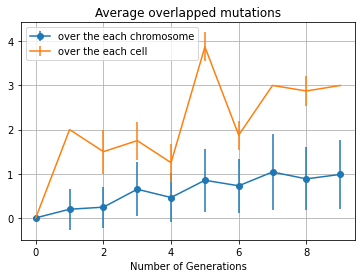

In [19]:
fig, ax = plt.subplots() 
ax.set_title("Average overlapped mutations")
ax.set_xlabel("Number of Generations")
ax.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o', label='over the each chromosome')
ax.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], label='over the each cell')
ax.legend()
ax.grid(True)

Test with halved number of generations

In [5]:
number_of_generations = 3

In [6]:
n_tot = 10
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib, visual = True)
     plots.append(simul.chromosome_visualizator(1))
     ave, stdv = simul.stat_superposed_mutations()
     max_ave, max_stdv = simul.stat_max_superposed_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.1953125, standard deviation: 0.4686848913115826
max average: 2.0, max standard deviation: 0.0

Number of events: 2
average: 0.2421875, standard deviation: 0.4634465609363716
max average: 1.5, max standard deviation: 0.5

Number of events: 3
average: 0.6484375, standard deviation: 0.6071172115775915
max average: 1.75, max standard deviation: 0.4330127018922193

Number of events: 4
average: 0.4609375, standard deviation: 0.5576505367107163
max average: 1.25, max standard deviation: 0.4330127018922193

Number of events: 5
average: 0.8515625, standard deviation: 0.7080987279989635
max average: 3.875, max standard deviation: 0.33071891388307384

Number of events: 6
average: 0.7265625, standard deviation: 0.6087236101826099
max average: 1.875, max standard deviation: 0.33071891388307384

Number of events: 7
average: 1.0390625, standard deviation: 0.85149082

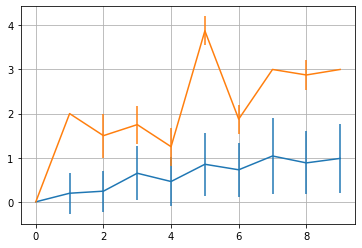

In [7]:
plt.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1])
plt.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1])
plt.grid(True)

In [8]:
np.sqrt(2)

1.4142135623730951